In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("c://j-works22/works/data/prac_2022.csv")

In [3]:
df.shape

(216, 5)

In [4]:
x=df['kr_ip']
y=df['term_spread']

In [5]:
np.corrcoef(x,y)

array([[1.        , 0.25327851],
       [0.25327851, 1.        ]])

In [23]:
ols=smf.ols('y~x', data=df).fit()
print(ols.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     14.67
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           0.000168
Time:                        11:52:15   Log-Likelihood:                -238.52
No. Observations:                 216   AIC:                             481.0
Df Residuals:                     214   BIC:                             487.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7991      0.051     15.782      0.0

In [25]:
from matplotlib import pyplot as plt

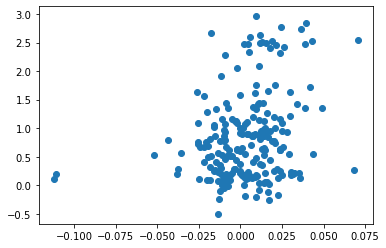

In [26]:
plt.scatter(x,y)

In [26]:
# autocorrelation
def acf(x):
     return np.correlate(x,x, mode='full')
z=acf(y)
z[1:10]

array([ 0.83388,  1.14726,  0.90125,  0.31339, -0.2331 , -0.84019,
       -1.00613, -0.93905, -0.70991])

In [7]:
from statsmodels.tsa.stattools import adfuller
def adf(x):
    return adfuller(x, autolag='AIC')

adf(y)
#adfoutput=pd.Series(adftest[0:4], index=['test', 'pvalue', 'lags', 'sample size'])
#print(adfoutput)

(-3.1734973650703138,
 0.02157092761980104,
 1,
 214,
 {'1%': -3.4612821203214907,
  '5%': -2.875142613826617,
  '10%': -2.574020122281422},
 -44.222037313226394)

In [11]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(y, regression='c', autolag='aic', store=False, regresults=False)
adf

(-3.1734973650703138,
 0.02157092761980104,
 1,
 214,
 {'1%': -3.4612821203214907,
  '5%': -2.875142613826617,
  '10%': -2.574020122281422},
 -44.222037313226394)

In [25]:
adf0=adf[0]
adf1=adf[1]
adf2=adf[2]
adf3=adf[3]
adf4=adf[4]
# out={adf0, adf1, adf2, adf3}
#result=pd.Series(out)
#result
adf0=round(adf0, 4)
adf1=round(adf1, 4)
adf2=round(adf2, 4)
adf3=round(adf3, 4)

print('test value: %f' % adf0)
print('p-value: %f' % adf1)
print('lag: %f' % adf2)
print('sample size %f' % adf3)
print('cv=', adf4)

test value: -3.173500
p-value: 0.021600
lag: 1.000000
sample size 214.000000
cv= {'1%': -3.4612821203214907, '5%': -2.875142613826617, '10%': -2.574020122281422}
